start RRT path planning
aaa


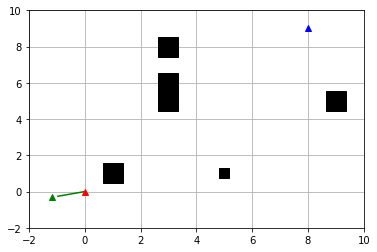

aaa


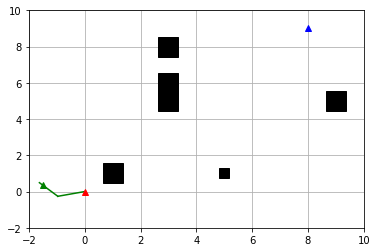

aaa


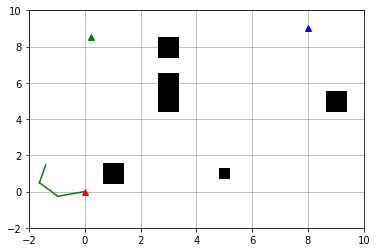

aaa


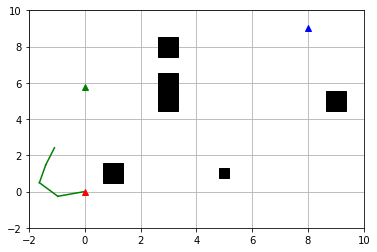

aaa


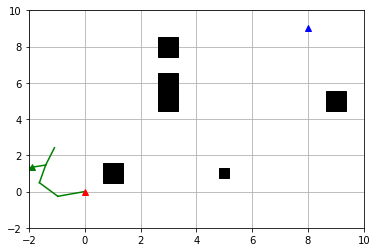

aaa


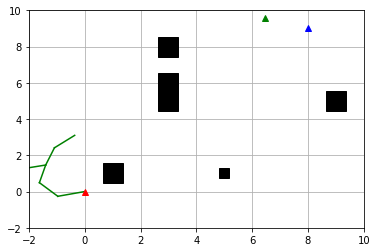

aaa


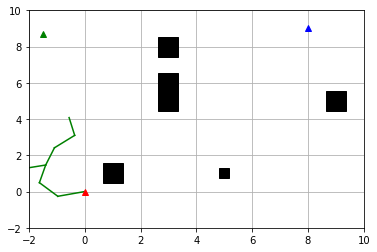

aaa


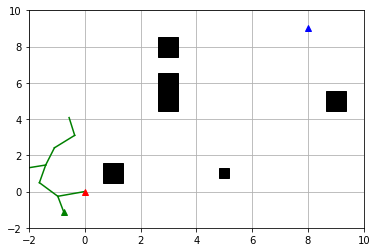

aaa


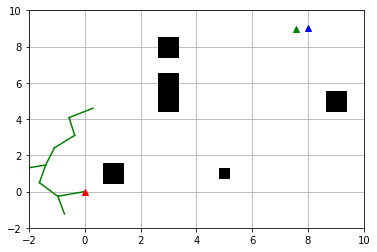

aaa


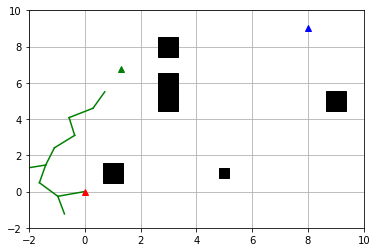

aaa


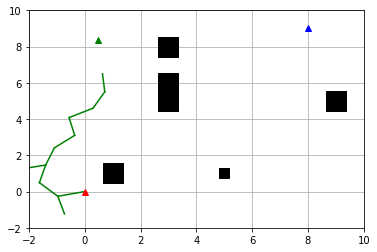

aaa


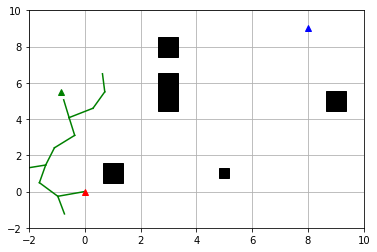

aaa


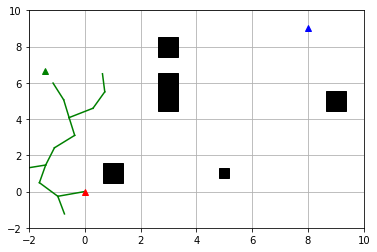

aaa


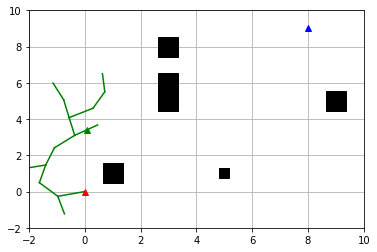

aaa


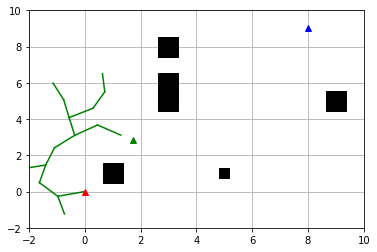

aaa


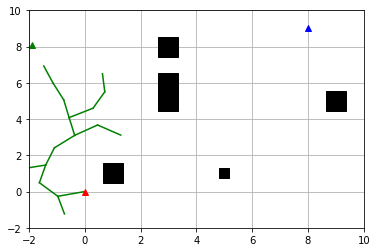

aaa


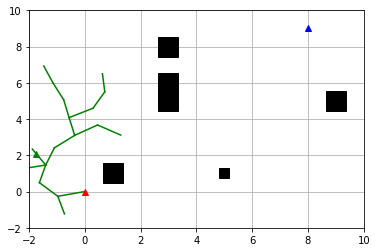

aaa


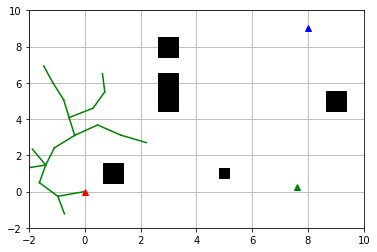

aaa


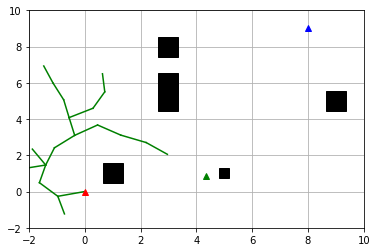

aaa


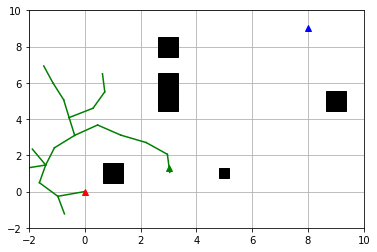

aaa


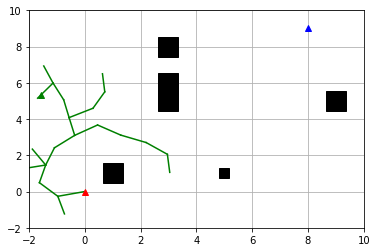

aaa


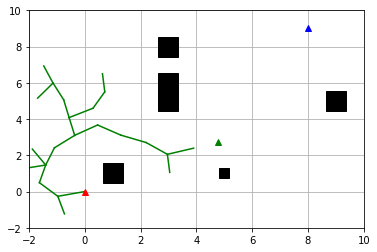

aaa


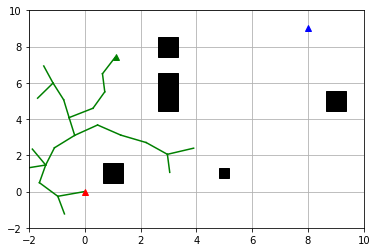

aaa


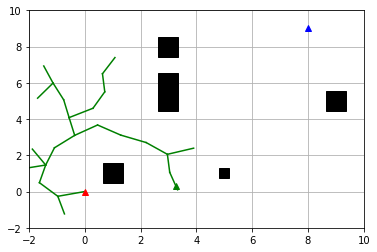

aaa


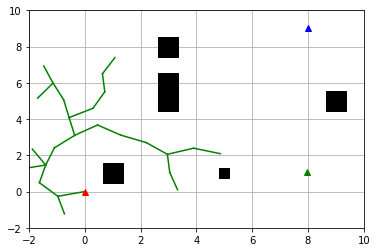

aaa


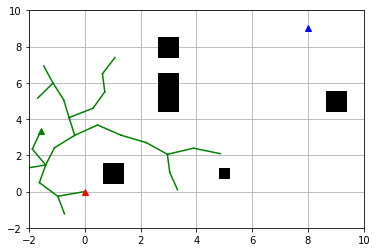

aaa


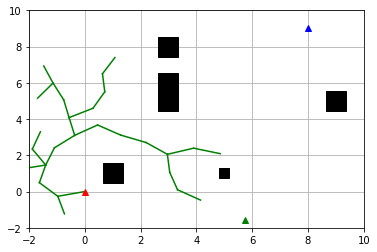

aaa


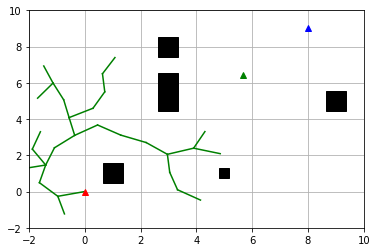

aaa


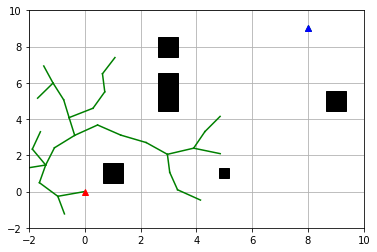

aaa


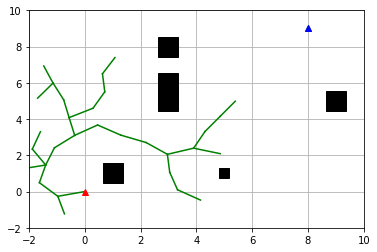

aaa


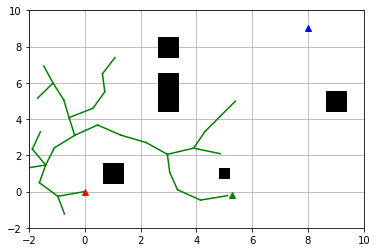

aaa


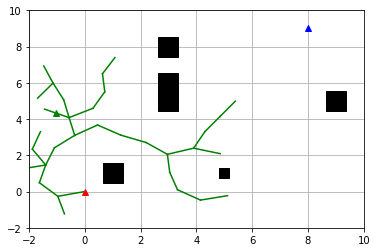

aaa


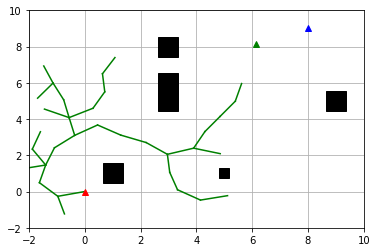

aaa


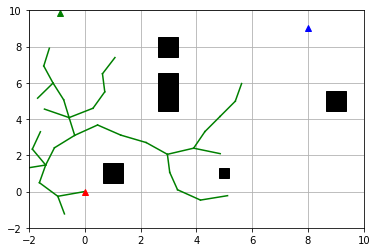

aaa


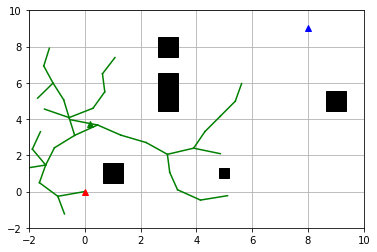

aaa


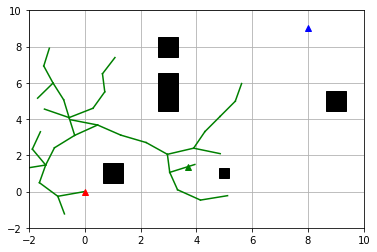

aaa


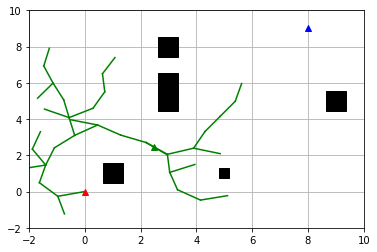

aaa


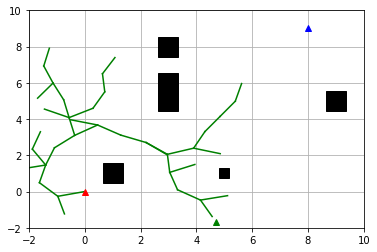

aaa


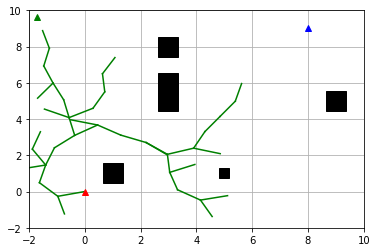

aaa


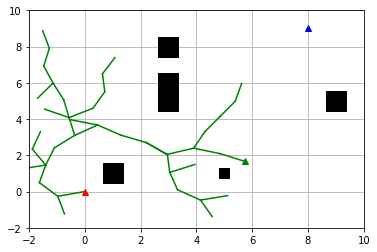

aaa


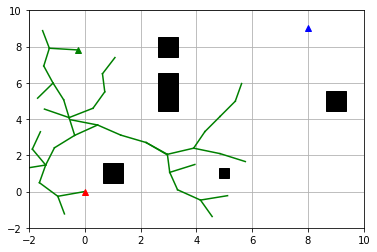

aaa


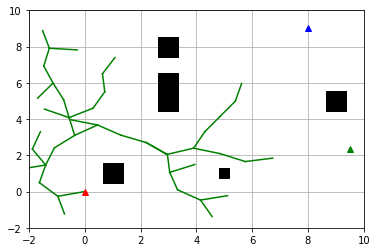

aaa


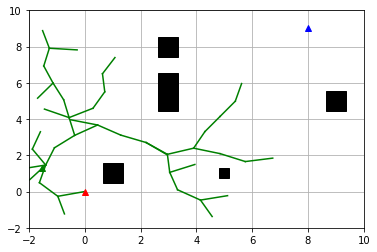

aaa


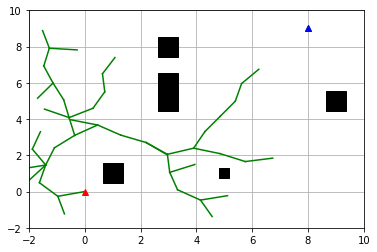

aaa


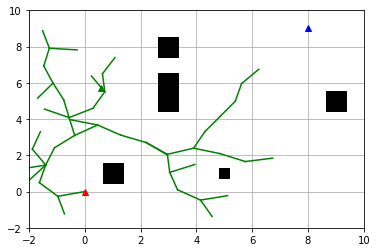

aaa


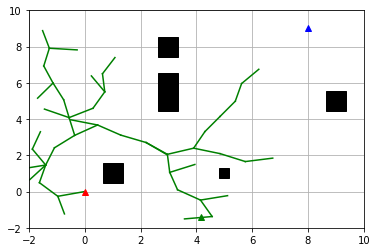

aaa


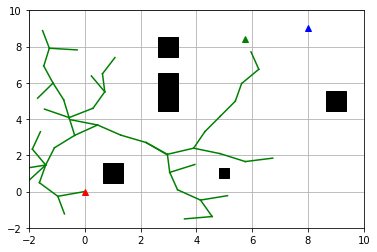

aaa


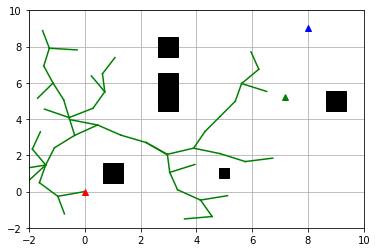

aaa


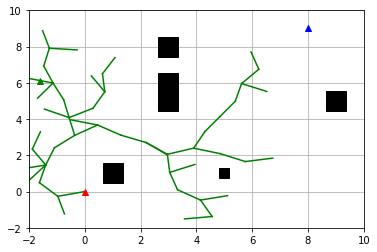

aaa


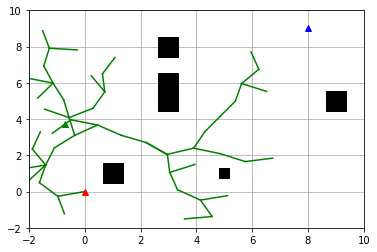

aaa


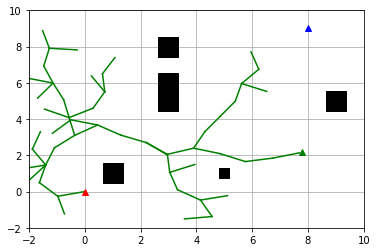

aaa


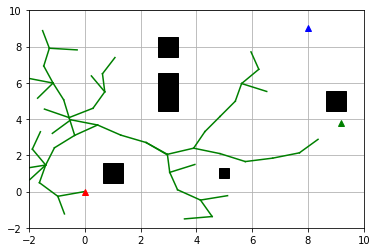

aaa


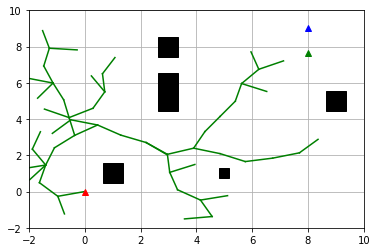

aaa


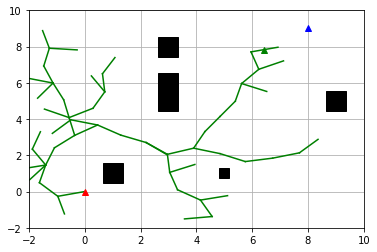

aaa


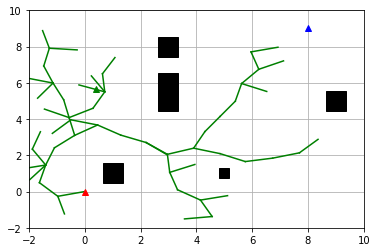

aaa


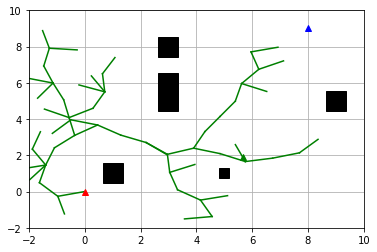

aaa


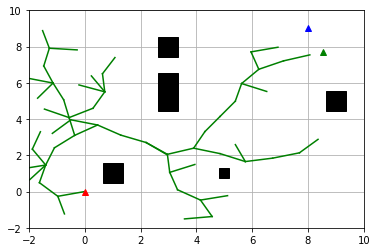

aaa


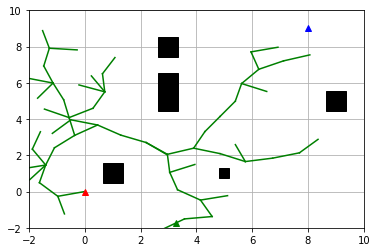

aaa


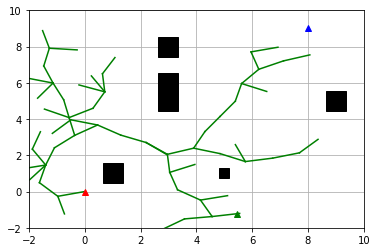

aaa


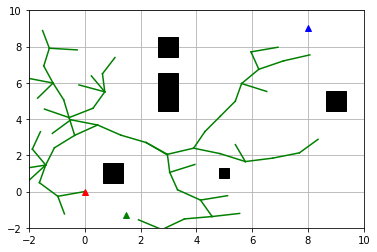

aaa


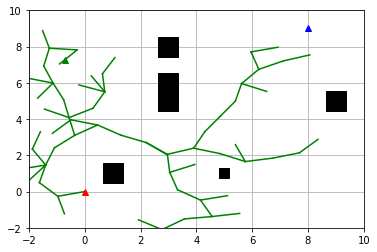

Goal!!
[[8, 9], [7.611919677861045, 8.692061372368828], [6.925451596375277, 7.96490143597158], [5.95890060354903, 7.70842691819916], [6.2383292359597915, 6.748260453783196], [5.622142495508461, 5.960660364339343], [5.39566135312924, 4.9866448140802095], [4.851311189958208, 4.147786721280437], [4.306961026787176, 3.308928628480665], [3.90271521379835, 2.394278245721765], [2.9618160861749683, 2.0555913229781204], [2.201204868206164, 2.7047989747352545], [1.2897309970183488, 3.116156947967691], [0.4595980072427467, 3.6737223874330693], [-0.3609297267092184, 3.10211567139865], [-1.0867200193580924, 2.414199651017774], [-1.400261310751076, 1.46462508386066], [-1.625253717306122, 0.4902645669098915], [-0.9653222441339321, -0.2610612284124727], [0, 0]]


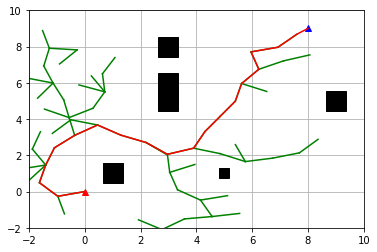

In [9]:
import matplotlib.pyplot as plt
import random
import math
import copy

show_animation = True


class Node(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None


class RRT(object):


    def __init__(self, start, goal, obstacle_list, rand_area):
        """
        Setting Parameter

        start:起始点 [x,y]
        goal:目标点 [x,y]
        obstacleList:障碍物 [[x,y,size],...]
        randArea:随机区域 [min,max]

        """
        self.start = Node(start[0], start[1])
        self.end = Node(goal[0], goal[1])
        self.min_rand = rand_area[0]
        self.max_rand = rand_area[1]
        self.expandDis = 1.0
        self.goalSampleRate = 0.05  # 选择终点的概率是0.05
        self.maxIter = 500
        self.obstacleList = obstacle_list
        self.nodeList = [self.start]

    def random_node(self):
        #产生随机节点
        node_x = random.uniform(self.min_rand, self.max_rand)
        node_y = random.uniform(self.min_rand, self.max_rand)
        node = [node_x, node_y]

        return node

    @staticmethod
    def get_nearest_list_index(node_list, rnd):
        #产生最近最近的节点
        d_list = [(node.x - rnd[0]) ** 2 + (node.y - rnd[1]) ** 2 for node in node_list]
        min_index = d_list.index(min(d_list))
        return min_index

    @staticmethod
    def collision_check(new_node, obstacle_list):
        a = 1
        for (ox, oy, size) in obstacle_list:
            dx = ox - new_node.x
            dy = oy - new_node.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= size:
                a = 0  # 0表示碰撞

        return a  

    def planning(self):

        while True:
            # 随机采样
            if random.random() > self.goalSampleRate:
                rnd = self.random_node()
            else:
                rnd = [self.end.x, self.end.y]

            # 寻找最近节点
            min_index = self.get_nearest_list_index(self.nodeList, rnd)
            # print(min_index)

            # 扩展树
            nearest_node = self.nodeList[min_index]

            # 返回弧度
            theta = math.atan2(rnd[1] - nearest_node.y, rnd[0] - nearest_node.x)

            new_node = copy.deepcopy(nearest_node)
            new_node.x += self.expandDis * math.cos(theta)
            new_node.y += self.expandDis * math.sin(theta)
            new_node.parent = min_index

            if not self.collision_check(new_node, self.obstacleList):
                continue

            self.nodeList.append(new_node)

            # check goal
            dx = new_node.x - self.end.x
            dy = new_node.y - self.end.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= self.expandDis:
                print("Goal!!")
                break

            if True:
                self.draw_graph(rnd)

        path = [[self.end.x, self.end.y]]
        last_index = len(self.nodeList) - 1
        while self.nodeList[last_index].parent is not None:
            node = self.nodeList[last_index]
            path.append([node.x, node.y])
            last_index = node.parent
        path.append([self.start.x, self.start.y])

        return path

    def draw_graph(self, rnd=None):
 
        print('aaa')
        plt.clf()  # 清除上次画的图
        if rnd is not None:
            plt.plot(rnd[0], rnd[1], "^g")
        for node in self.nodeList:
            if node.parent is not None:
                plt.plot([node.x, self.nodeList[node.parent].x], [
                         node.y, self.nodeList[node.parent].y], "-g")

        for (ox, oy, size) in self.obstacleList:
            plt.plot(ox, oy, "sk", ms=10*size)

        plt.plot(self.start.x, self.start.y, "^r")
        plt.plot(self.end.x, self.end.y, "^b")
        plt.axis([self.min_rand, self.max_rand, self.min_rand, self.max_rand])
        plt.grid(True)
        plt.pause(0.01)

    def draw_static(self, path):

        plt.clf()  # 清除上次画的图

        for node in self.nodeList:
            if node.parent is not None:
                plt.plot([node.x, self.nodeList[node.parent].x], [
                    node.y, self.nodeList[node.parent].y], "-g")

        for (ox, oy, size) in self.obstacleList:
            plt.plot(ox, oy, "sk", ms=10*size)

        plt.plot(self.start.x, self.start.y, "^r")
        plt.plot(self.end.x, self.end.y, "^b")
        plt.axis([self.min_rand, self.max_rand, self.min_rand, self.max_rand])

        plt.plot([data[0] for data in path], [data[1] for data in path], '-r')
        plt.grid(True)
        plt.show()


def main():
    print("start RRT path planning")

    obstacle_list = [
        (5, 1, 1),
        (3, 6, 2),
        (3, 8, 2),
        (1, 1, 2),
        (3, 5, 2),
        (9, 5, 2)]

    # Set Initial parameters
    rrt = RRT(start=[0, 0], goal=[8, 9], rand_area=[-2, 10], obstacle_list=obstacle_list)
    path = rrt.planning()
    print(path)

    # Draw final path
    if show_animation:
        plt.close()
        rrt.draw_static(path)


if __name__ == '__main__':
    main()